In [152]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp, pearsonr, linregress
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

In [153]:
DATA_PATH = "../data"

In [154]:
df = pd.read_json(f"{DATA_PATH}/raw-jsons/residues/pdb_library_1_residues.json")
df["ln_r_data"] = np.log(df["r_data"])

/opt/homebrew/Caskroom/miniconda/base/envs/py3/lib/python3.8/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [155]:
df_non_wc = df.query("r_type == 'NON-WC'")
df_wc = df.query("r_type == 'WC'")

In [156]:
df.columns

Index(['both_purine', 'both_pyrimidine', 'constructs', 'has_pdbs',
       'likely_pair', 'm_flank_bp_5p', 'm_flank_bp_3p', 'm_orientation',
       'm_pos', 'm_second_flank_bp_5p', 'm_second_flank_bp_3p', 'm_sequence',
       'm_structure', 'm_token', 'n_pdbs', 'pair_type', 'p5_res', 'p5_type',
       'p3_res', 'p3_type', 'r_data', 'r_nuc', 'r_loc_pos', 'r_pos', 'r_type',
       'ln_r_data'],
      dtype='object')

## probablity of being WC

## bulges

### 1-0

(0.0, 0.06)

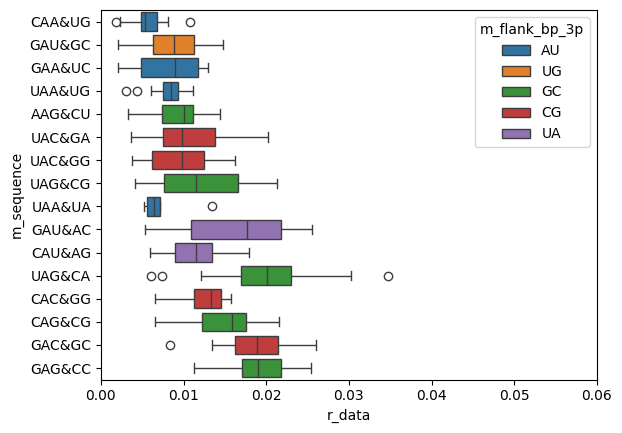

In [157]:
df_sub = df.query("m_token == '1x0' and r_nuc == 'A' and r_type == 'NON-WC'").copy()
df_sub.sort_values("r_data", inplace=True)  
ax = sns.boxplot(x="r_data", y="m_sequence", data=df_sub, hue="m_flank_bp_3p")
ax.set_xlim([0,  0.06])

In [158]:
df_sub.columns

Index(['both_purine', 'both_pyrimidine', 'constructs', 'has_pdbs',
       'likely_pair', 'm_flank_bp_5p', 'm_flank_bp_3p', 'm_orientation',
       'm_pos', 'm_second_flank_bp_5p', 'm_second_flank_bp_3p', 'm_sequence',
       'm_structure', 'm_token', 'n_pdbs', 'pair_type', 'p5_res', 'p5_type',
       'p3_res', 'p3_type', 'r_data', 'r_nuc', 'r_loc_pos', 'r_pos', 'r_type',
       'ln_r_data'],
      dtype='object')

(0.0, 0.06)

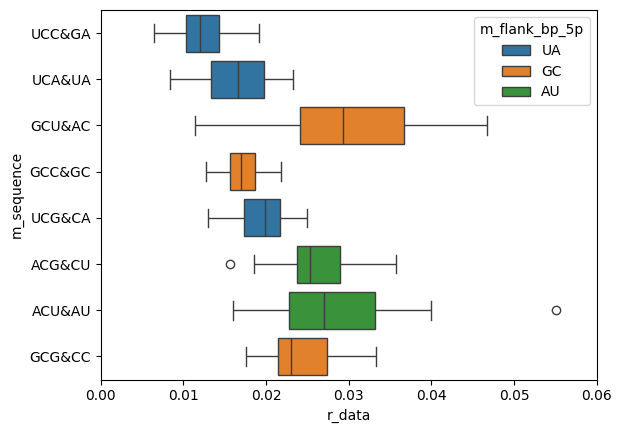

In [159]:
df_sub = df.query("m_token == '1x0' and r_nuc == 'C' and r_type == 'NON-WC'").copy()
df_sub.sort_values("r_data", inplace=True)  
ax = sns.boxplot(x="r_data", y="m_sequence", data=df_sub, hue="m_flank_bp_5p")
ax.set_xlim([0,  0.06])

<Axes: xlabel='r_nuc', ylabel='r_data'>

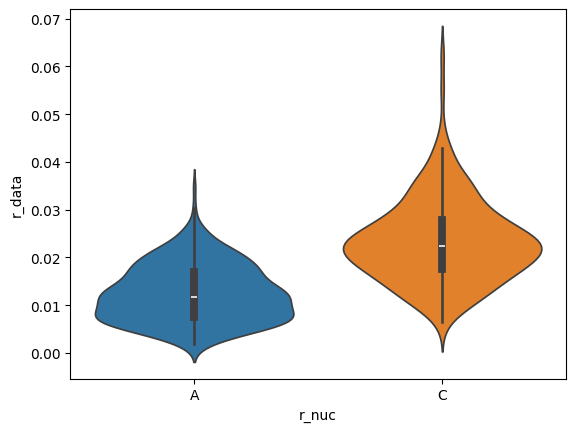

In [160]:
df_sub = df.query("m_token == '1x0' and r_type == 'NON-WC'").copy()
sns.violinplot(x="r_nuc", y="r_data", data=df_sub, hue="r_nuc")


In [161]:
df_sub_1 = df.query("m_token == '1x0' and r_nuc == 'A' and r_type == 'NON-WC'").copy()
df_sub_2 = df.query("m_token == '1x0' and r_nuc == 'C' and r_type == 'NON-WC'").copy()
ks_2samp(df_sub_1["r_data"], df_sub_2["r_data"])

KstestResult(statistic=0.546140266409886, pvalue=2.3831508825696994e-33, statistic_location=0.017050000000000003, statistic_sign=1)

### 2-0

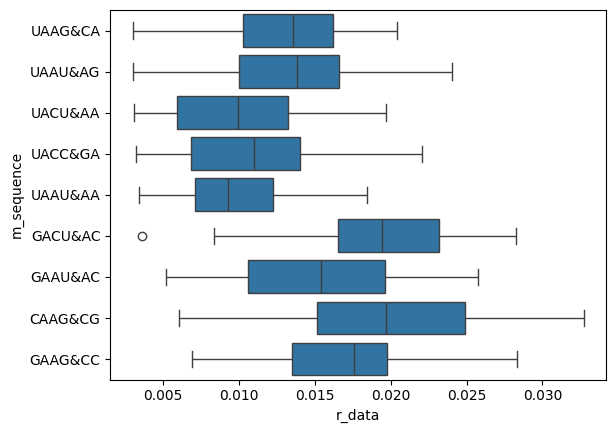

In [162]:
df_sub = df.query("m_token == '2x0' and r_nuc == 'A' and r_type == 'NON-WC'").copy()
df_sub.sort_values("r_data", inplace=True)  
ax = sns.boxplot(x="r_data", y="m_sequence", data=df_sub)

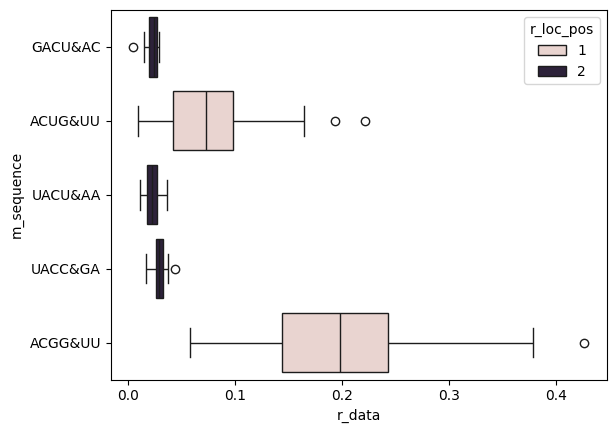

In [163]:
df_sub = df.query("m_token == '2x0' and r_nuc == 'C' and r_type == 'NON-WC'").copy()
df_sub.sort_values("r_data", inplace=True)  
ax = sns.boxplot(x="r_data", y="m_sequence", data=df_sub, hue="r_loc_pos")

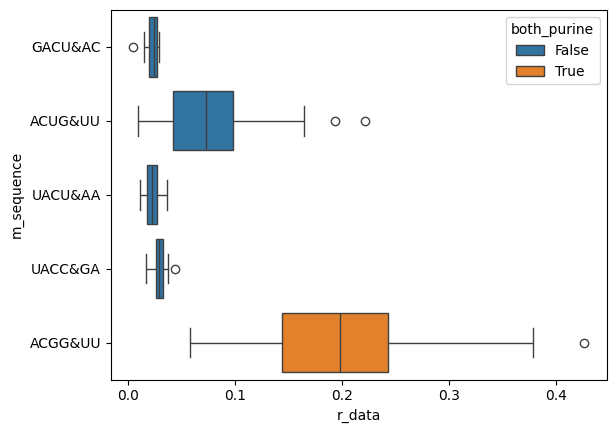

In [164]:
ax = sns.boxplot(x="r_data", y="m_sequence", data=df_sub, hue="both_purine")

<Axes: xlabel='m_token', ylabel='r_data'>

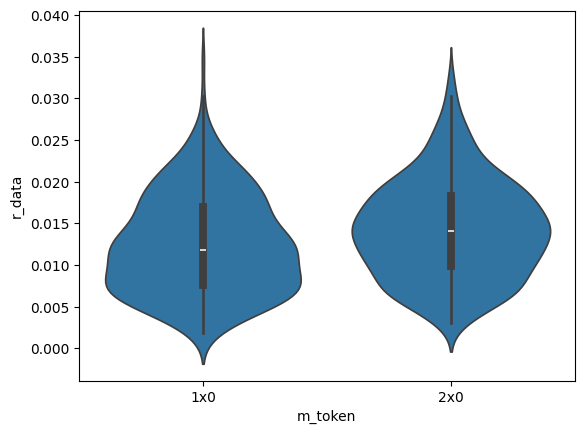

In [165]:
df_sub = df.query("(m_token == '1x0' or m_token == '2x0') and r_nuc == 'A' and r_type == 'NON-WC'").copy()
sns.violinplot(x="m_token", y="r_data", data=df_sub)


### 3-0

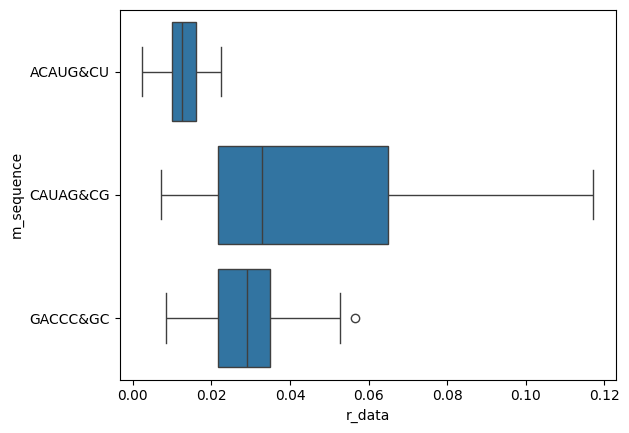

In [166]:
df_sub = df.query("m_token == '3x0' and r_nuc == 'A' and r_type == 'NON-WC'").copy()
df_sub.sort_values("r_data", inplace=True)  
ax = sns.boxplot(x="r_data", y="m_sequence", data=df_sub)

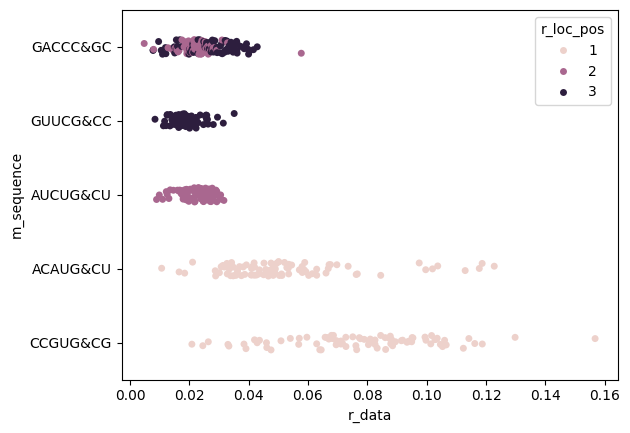

In [167]:
df_sub = df.query("m_token == '3x0' and r_nuc == 'C' and r_type == 'NON-WC'").copy()
df_sub.sort_values("r_data", inplace=True)  
ax = sns.stripplot(x="r_data", y="m_sequence", data=df_sub, hue="r_loc_pos")

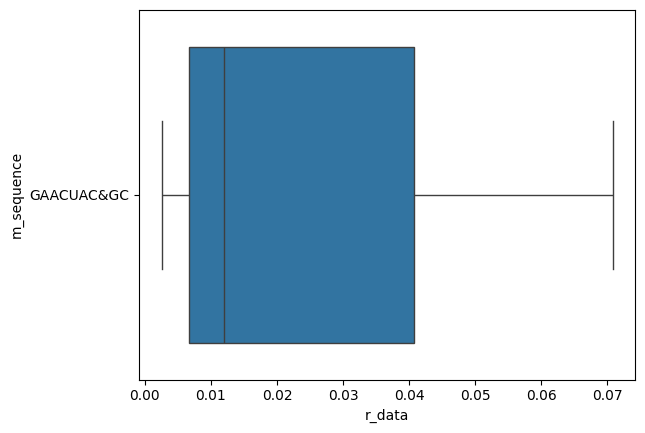

In [168]:
df_sub = df.query("m_token == '5x0' and r_nuc == 'A' and r_type == 'NON-WC'").copy()
df_sub.sort_values("r_data", inplace=True)  
ax = sns.boxplot(x="r_data", y="m_sequence", data=df_sub)

## mismatches

### 1x1

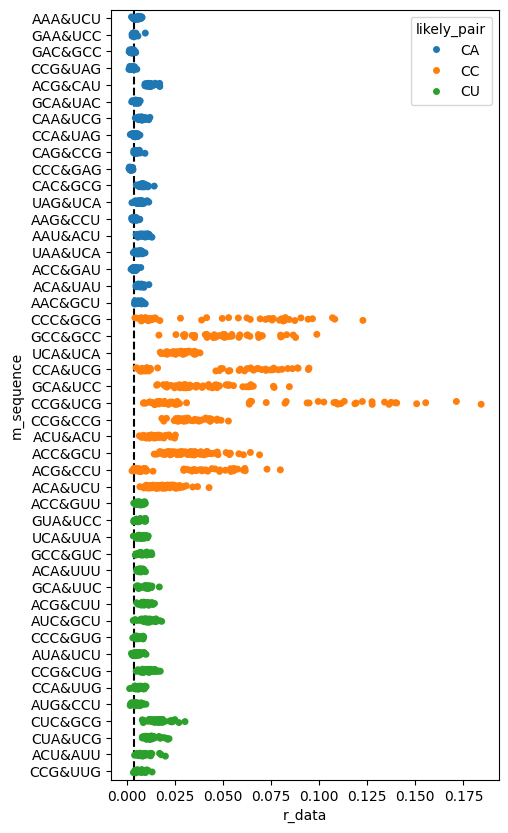

In [169]:
fig, ax = plt.subplots(figsize=(5, 10))
df_sub = df.query("m_token == '1x1' and r_nuc == 'C' and r_type == 'NON-WC'").copy()
df_sub["stack"] = df_sub["p5_res"] + df_sub["p3_res"]
df_sub.sort_values("likely_pair", inplace=True)  
ax = sns.stripplot(x="r_data", y="m_sequence", data=df_sub, hue='likely_pair', ax=ax)
plt.axvline(x=0.00351752, color='black', linestyle='--')

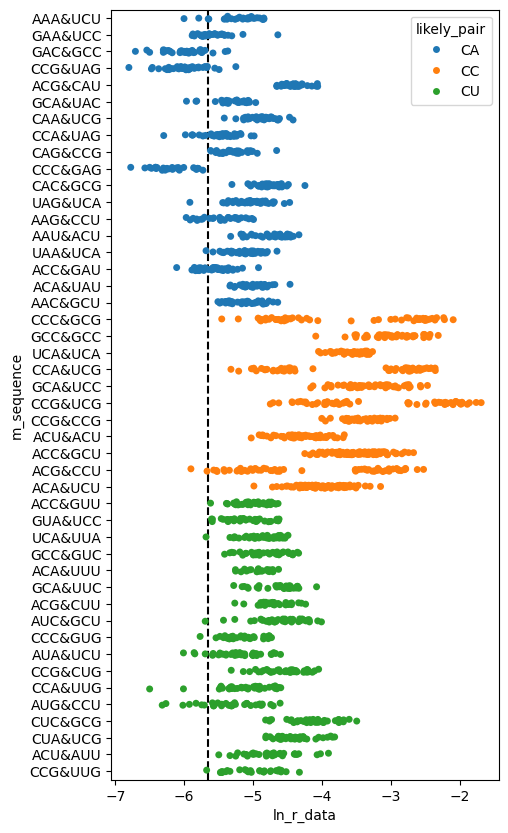

In [170]:
fig, ax = plt.subplots(figsize=(5, 10))
df_sub = df.query("m_token == '1x1' and r_nuc == 'C' and r_type == 'NON-WC'").copy()
df_sub["stack"] = df_sub["p5_res"] + df_sub["p3_res"]
df_sub.sort_values("likely_pair", inplace=True)  
ax = sns.stripplot(x="ln_r_data", y="m_sequence", data=df_sub, hue='likely_pair', ax=ax)
plt.axvline(x=-5.65, color='black', linestyle='--')

<Axes: xlabel='r_data', ylabel='stack'>

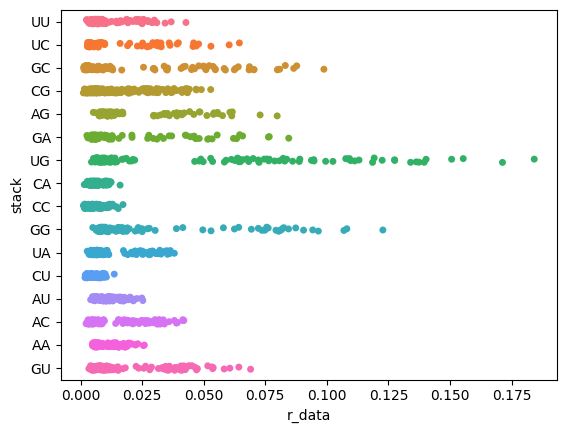

In [171]:
sns.stripplot(x="r_data", y="stack", data=df_sub, hue="stack")

In [172]:
count_wc = 0
count_non_wc = 0
for m_sequence, g in df_sub.query('likely_pair == "CA"').groupby("m_sequence"):
    ks1, p_val = ks_2samp(g["ln_r_data"], df_wc["ln_r_data"])
    ks2, p_val = ks_2samp(g["ln_r_data"], df_non_wc["ln_r_data"])
    if ks1 < ks2:
        print(m_sequence, ks1, ks2, p_val)
        count_wc += 1
    else:
        count_non_wc += 1
count_wc, count_non_wc

AAA&UCU 0.7686975626983318 0.7845498291885538 3.7428432345674485e-18
AAG&CCU 0.7362468322601639 0.8236564669580869 2.0602265446675215e-21
ACC&GAU 0.7437449317336511 0.8345014632234997 4.30907917390388e-33
CCA&UAG 0.7175544555431749 0.8214818352128714 3.690833695053983e-30
CCC&GAG 0.3844273014892166 0.9459207287955038 1.2384041879205078e-34
CCG&UAG 0.5068430897505207 0.8953971146520925 1.602507404975958e-45
GAA&UCC 0.7688067604744954 0.8290727347766054 2.2130227942741866e-26
GAC&GCC 0.5016418013469675 0.8980053631120744 4.345333311123975e-39
GCA&UAC 0.7791075736210975 0.8159938287477501 1.6568385813232065e-24


(9, 9)

In [173]:
count_wc = 0
count_non_wc = 0
for m_sequence, g in df_sub.query('likely_pair == "UC"').groupby("m_sequence"):
    ks1, p_val = ks_2samp(g["ln_r_data"], df_wc["ln_r_data"])
    ks2, p_val = ks_2samp(g["ln_r_data"], df_non_wc["ln_r_data"])
    if ks1 < ks2:
        print(m_sequence, ks1, ks2, p_val)
        count_wc += 1
    else:
        count_non_wc += 1
count_wc, count_non_wc

(0, 0)

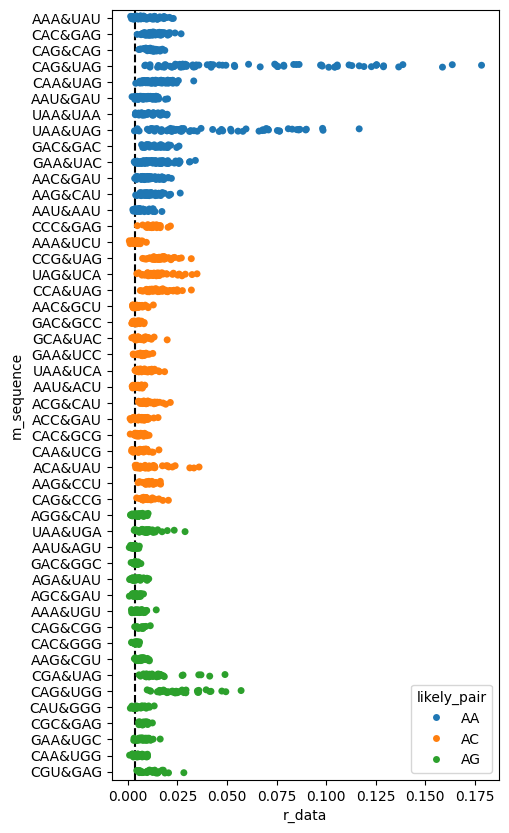

In [174]:
fig, ax = plt.subplots(figsize=(5, 10))
df_sub = df.query("m_token == '1x1' and r_nuc == 'A' and r_type == 'NON-WC'").copy()
df_sub["stack"] = df_sub["p5_res"] + df_sub["p3_res"]
df_sub.sort_values("likely_pair", inplace=True)  
ax = sns.stripplot(x="r_data", y="m_sequence", data=df_sub, hue='likely_pair', ax=ax)
plt.axvline(x=0.00351752, color='black', linestyle='--')

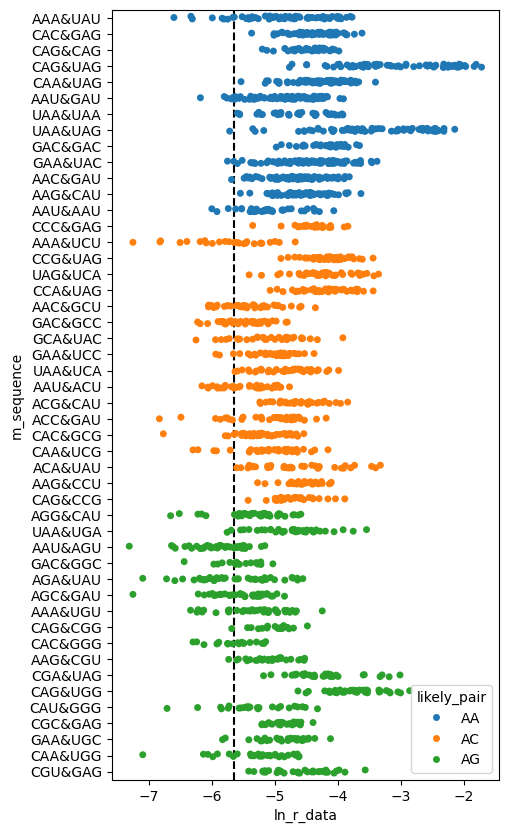

In [175]:
fig, ax = plt.subplots(figsize=(5, 10))
df_sub = df.query("m_token == '1x1' and r_nuc == 'A' and r_type == 'NON-WC'").copy()
df_sub["stack"] = df_sub["p5_res"] + df_sub["p3_res"]
df_sub.sort_values("likely_pair", inplace=True)  
ax = sns.stripplot(x="ln_r_data", y="m_sequence", data=df_sub, hue='likely_pair', ax=ax)
plt.axvline(x=-5.65, color='black', linestyle='--')

In [176]:
count_wc = 0
count_non_wc = 0
for m_sequence, g in df_sub.groupby("m_sequence"):
    ks1, p_val = ks_2samp(g["ln_r_data"], df_wc["ln_r_data"])
    ks2, p_val = ks_2samp(g["ln_r_data"], df_non_wc["ln_r_data"])
    if ks1 < ks2:
        print(m_sequence, ks1, ks2, p_val)
        count_wc += 1
    else:
        count_non_wc += 1
count_wc, count_non_wc

AAA&UCU 0.45563009490711065 0.7703758123917548 2.4706946569223307e-17
AAA&UGU 0.675026165988863 0.705074140738836 1.6334595067589606e-21
AAU&ACU 0.6738437103243367 0.7767264588856446 1.3090324038953905e-26
AAU&AGU 0.45710574695827033 0.8590383131910517 5.86537635086884e-37
AGA&UAU 0.516758441319395 0.6983151501793826 4.915887424645133e-21
AGC&GAU 0.6321578594460276 0.7920884913492268 2.5137119971086275e-27
CAA&UGG 0.666060749115005 0.7143151012011901 5.021028938525127e-17
CAC&GGG 0.6067866052675692 0.8567534805128016 2.7375191068020418e-17
GAC&GCC 0.6865194797511167 0.7728464901002828 5.151365687283568e-25
GAC&GGC 0.6852521243253875 0.8315982808654446 4.437963019406426e-15


(10, 38)

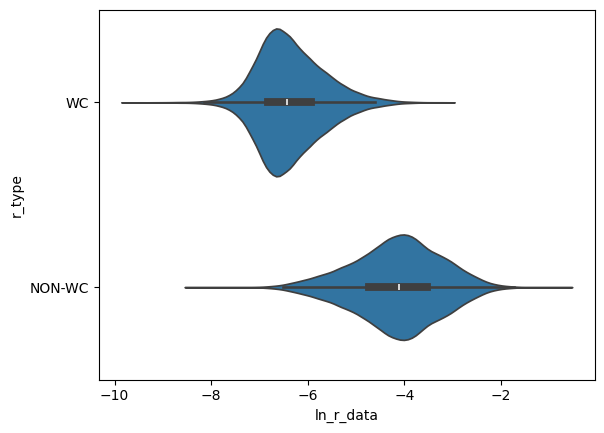

In [177]:
ax = sns.violinplot(x="ln_r_data", y="r_type", data=df)
plt.axvline(x=-5.65, color='black', linestyle='--')


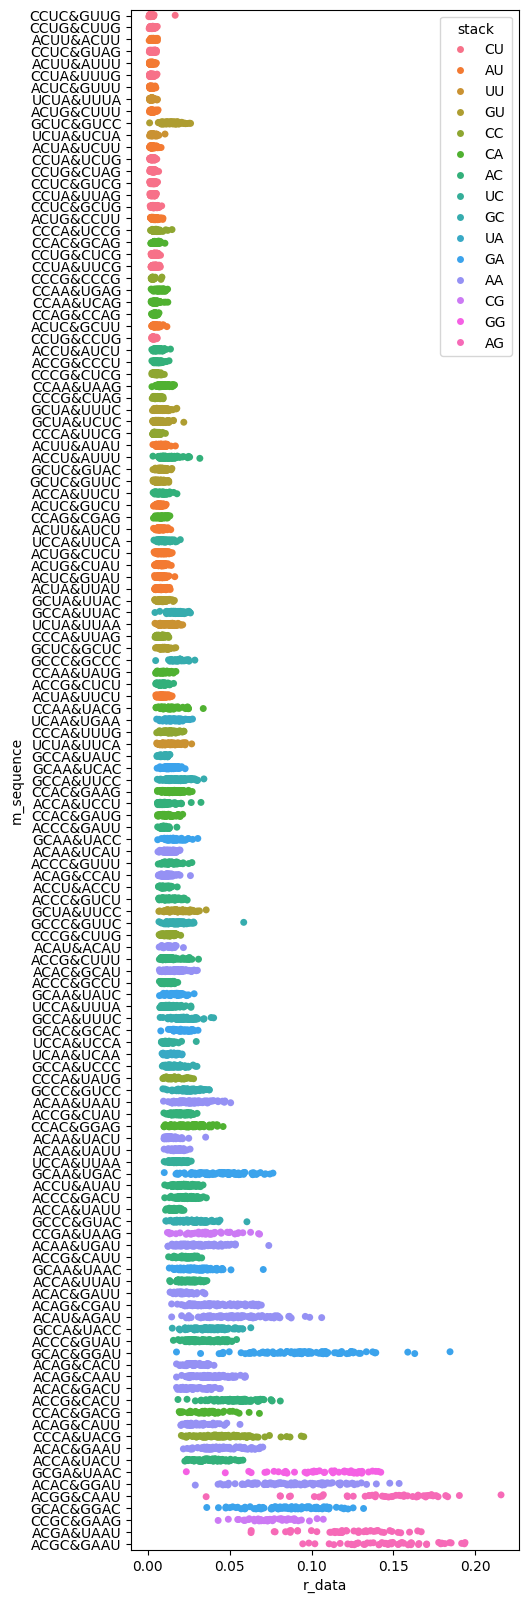

In [178]:
fig, ax = plt.subplots(figsize=(5, 20))
df_sub = df.query("m_token == '2x2' and r_nuc == 'C' and r_type == 'NON-WC' and r_loc_pos == 1").copy()
df_sub["stack"] = df_sub["p5_res"] + df_sub["p3_res"]
df_sub.sort_values("r_data", inplace=True)  
ax = sns.stripplot(x="r_data", y="m_sequence", data=df_sub, ax=ax, hue="stack")

<Axes: xlabel='r_data', ylabel='stack'>

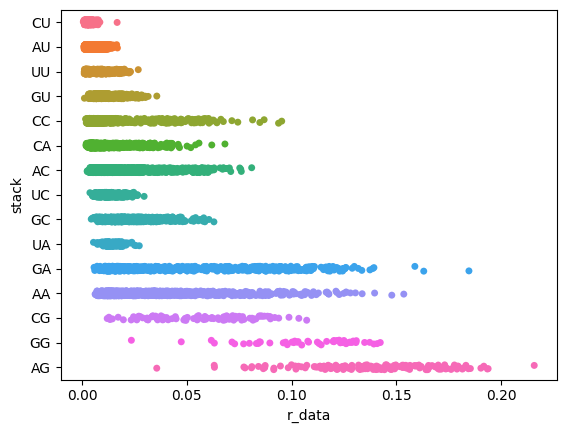

In [179]:
sns.stripplot(x="r_data", y="stack", data=df_sub, hue="stack")

### 2x2

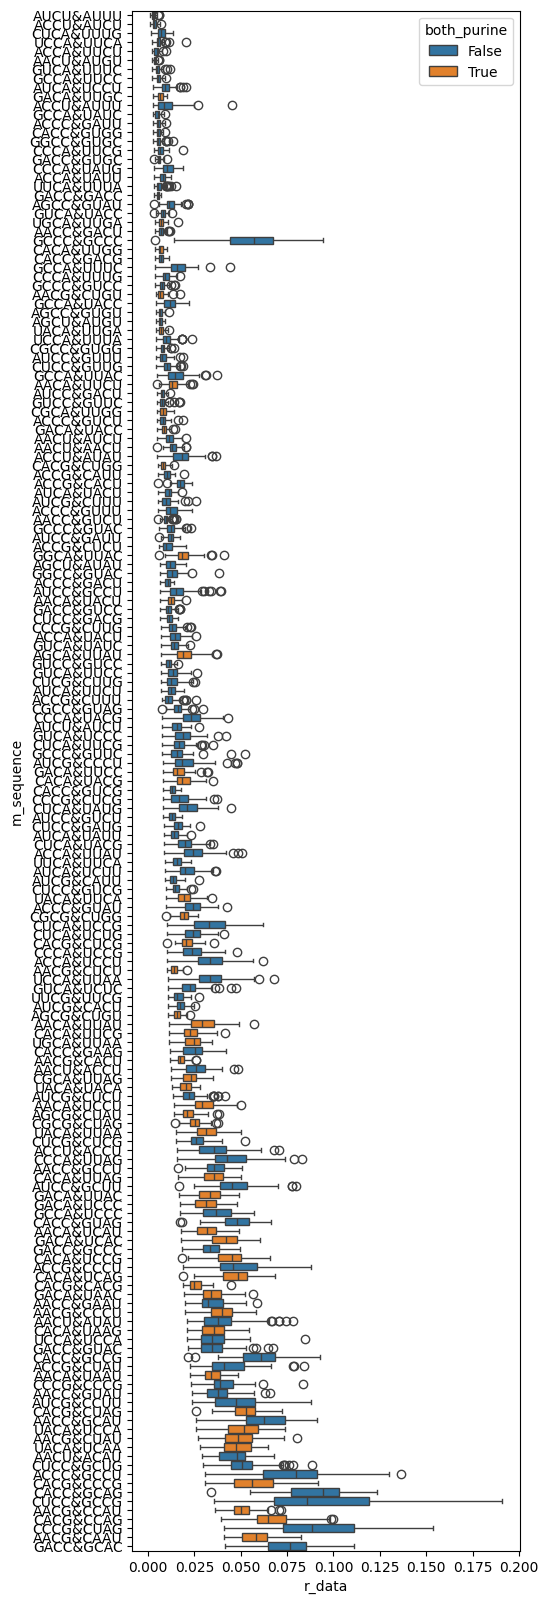

In [180]:
fig, ax = plt.subplots(figsize=(5, 20))
df_sub = df.query("m_token == '2x2' and r_nuc == 'C' and r_type == 'NON-WC' and r_loc_pos == 2").copy()
df_sub.sort_values("r_data", inplace=True)  
ax = sns.boxplot(x="r_data", y="m_sequence", data=df_sub, ax=ax, hue="both_purine")

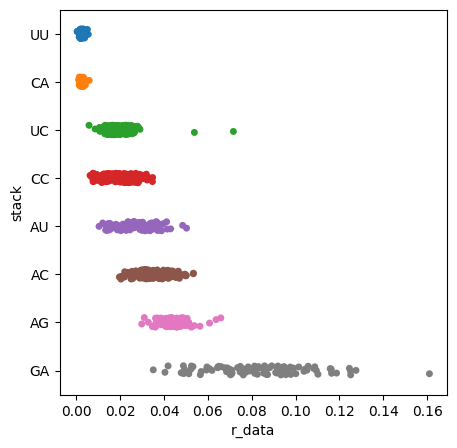

In [181]:
fig, ax = plt.subplots(figsize=(5, 5))
df_sub = df.query("m_token == '3x3' and r_nuc == 'C' and r_type == 'NON-WC'").copy()
df_sub["stack"] = df_sub["p5_res"] + df_sub["p3_res"]
df_sub.sort_values("r_data", inplace=True)  
ax = sns.stripplot(x="r_data", y="stack", data=df_sub, ax=ax, hue="stack")

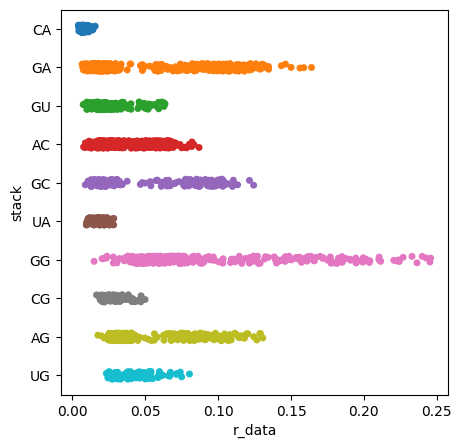

In [182]:
fig, ax = plt.subplots(figsize=(5, 5))
df_sub = df.query("m_token == '3x3' and r_nuc == 'A' and r_type == 'NON-WC'").copy()
df_sub["stack"] = df_sub["p5_res"] + df_sub["p3_res"]
df_sub.sort_values("r_data", inplace=True)  
ax = sns.stripplot(x="r_data", y="stack", data=df_sub, ax=ax, hue="stack")

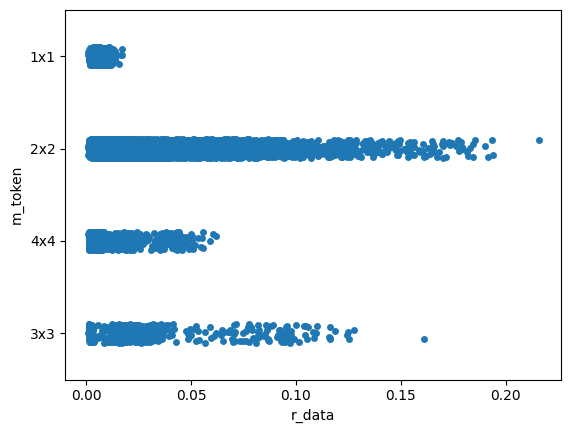

In [183]:
tokens = ["1x1", "2x2", "3x3", "4x4"]
df_sub = df.query("(m_token in @tokens) and (likely_pair == 'CA' or likely_pair == 'AC') and r_nuc == 'C' and r_type == 'NON-WC'").copy()
df_sub["stack"] = df_sub["p5_res"] + df_sub["p3_res"]
ax = sns.stripplot(x="r_data", y="m_token", data=df_sub)

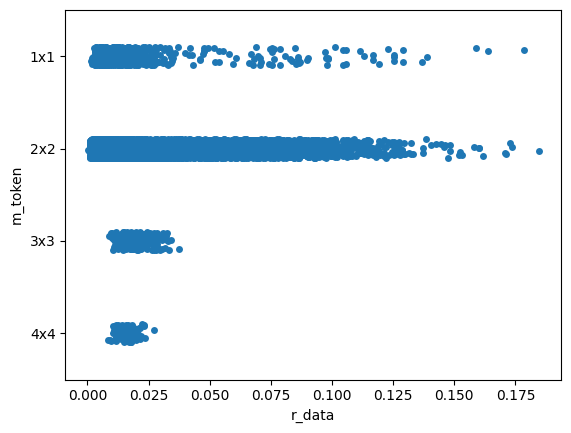

In [184]:
tokens = ["1x1", "2x2", "3x3", "4x4"]
df_sub = df.query("(m_token in @tokens) and (likely_pair == 'AA' or likely_pair == 'AA') and r_nuc == 'A' and r_type == 'NON-WC'").copy()
df_sub["stack"] = df_sub["p5_res"] + df_sub["p3_res"]
ax = sns.stripplot(x="r_data", y="m_token", data=df_sub)

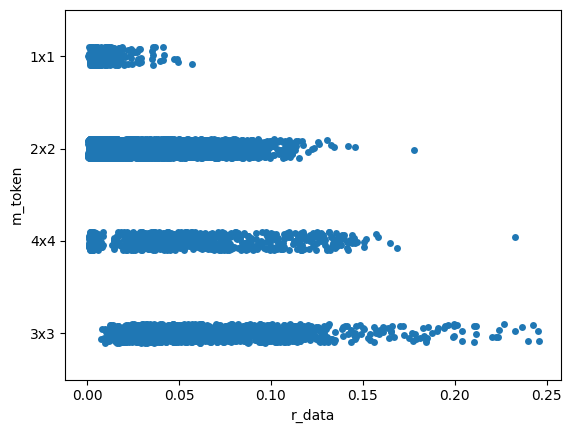

In [185]:
tokens = ["1x1", "2x2", "3x3", "4x4"]
df_sub = df.query("(m_token in @tokens) and (likely_pair == 'AG' or likely_pair == 'GA') and r_nuc == 'A' and r_type == 'NON-WC'").copy()
df_sub["stack"] = df_sub["p5_res"] + df_sub["p3_res"]
ax = sns.stripplot(x="r_data", y="m_token", data=df_sub)

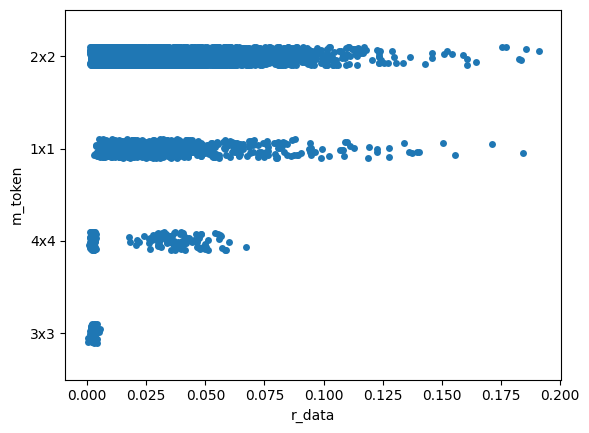

In [186]:
tokens = ["1x1", "2x2", "3x3", "4x4"]
df_sub = df.query("(m_token in @tokens) and (likely_pair == 'CC' or likely_pair == 'CC') and r_nuc == 'C' and r_type == 'NON-WC'").copy()
df_sub["stack"] = df_sub["p5_res"] + df_sub["p3_res"]
ax = sns.stripplot(x="r_data", y="m_token", data=df_sub)

## probability

In [187]:
df['ln_r_data'].replace(-np.inf, -10, inplace=True)
df["ln_r_data"].describe()

count    237528.000000
mean         -5.090406
std           1.367130
min         -10.000000
25%          -6.319969
50%          -5.057727
75%          -3.966479
max          -0.691768
Name: ln_r_data, dtype: float64

In [188]:
from sklearn.linear_model import LogisticRegression

# Convert 'r_type' to binary (1 for 'WC', 0 for 'NON-WC')
df['r_type_binary'] = df['r_type'].apply(lambda x: 1 if x == 'WC' else 0)

# Fit the logistic regression model
model = LogisticRegression()
model.fit(df[['ln_r_data']], df['r_type_binary'])

# Compute probabilities for the original data
df['prob_WC'] = model.predict_proba(df[['ln_r_data']])[:, 1]

# Display the probabilities
df.sort_values('prob_WC', ascending=False)[['ln_r_data', 'r_type', 'prob_WC']]


,ln_r_data,r_type,prob_WC
136078,-10.000000,WC,0.999998
28731,-10.000000,WC,0.999998
66506,-10.000000,WC,0.999998
58333,-10.000000,WC,0.999998
8841,-10.000000,WC,0.999998
...,...,...,...
234212,-1.013022,NON-WC,0.000003
234179,-0.994414,NON-WC,0.000003
55879,-0.972755,NON-WC,0.000003
55890,-0.853363,NON-WC,0.000002


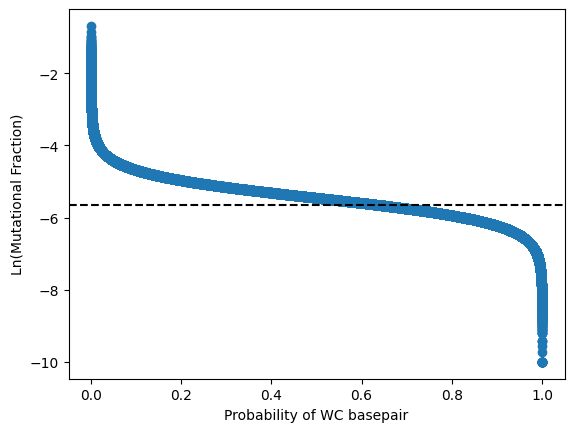

In [197]:
plt.scatter(df['prob_WC'], df['ln_r_data'])
plt.xlabel('Probability of WC basepair')
plt.ylabel('Ln(Mutational Fraction)')
plt.axhline(y=-5.65, color='black', linestyle='--')



In [190]:
df_non_wc = df.query("r_type == 'NON-WC' and (r_nuc == 'A' or r_nuc == 'C')").copy()
df_sub_1 = df_non_wc.query("ln_r_data < -5.46").copy()
df_sub_1.value_counts("m_token")

m_token
2x2    9300
1x1     581
4x4     578
3x2     336
3x1     264
3x3     205
5x4     181
6x3     157
4x3     105
5x3      80
2x1      36
4x2      36
1x0      18
5x0      16
2x0      13
5x1       8
3x0       1
4x1       1
dtype: int64

In [191]:
df_sub_1.value_counts("likely_pair")

likely_pair
AG    3116
CU    1825
AA    1428
      1252
UU    1005
CC     905
CA     887
UC     789
AC     387
GA     251
GG      71
dtype: int64

In [192]:
df_non_wc = df.query("r_type == 'NON-WC' and (r_nuc == 'A' or r_nuc == 'C')").copy()
count = 0
total = 0
for [r_loc_pos, m_sequence], g in df_non_wc.groupby(["r_loc_pos", "m_sequence"]):
    avg = g["ln_r_data"].mean()
    if avg < -5.46:
        count += 1
    total += 1
total, count, count/total * 100

(1745, 130, 7.4498567335243555)

In [193]:
df_non_wc = df.query("r_type == 'WC' and (r_nuc == 'A' or r_nuc == 'C')").copy()
count = 0
total = 0
for [r_loc_pos, m_sequence], g in df_non_wc.groupby(["r_loc_pos", "m_sequence"]):
    avg = g["ln_r_data"].mean()
    if avg > -5.46:
        count += 1
    total += 1
total, count, count/total * 100

(1378, 121, 8.780841799709723)

In [194]:
df_non_wc = df.query("r_type == 'NON-WC' and (r_nuc == 'A' or r_nuc == 'C')").copy()
df_non_wc_under = df_non_wc.query("ln_r_data < -5.46").copy()
df_stats = []
pairs = ['AA', 'AC', 'CA', 'GA', 'AG', 'CU', 'CC']
for p in pairs:
    df_sub = df_non_wc_under.query(f"likely_pair == '{p}'")
    df_sub_under = df_non_wc.query(f"likely_pair == '{p}'")
    print(p, len(df_sub), len(df_sub_under), len(df_sub)/len(df_sub_under) * 100)

AA 1428 20854 6.8476071736837065
AC 387 14388 2.689741451209341
CA 887 15131 5.862137333950169
GA 251 6022 4.168050481567585
AG 3116 13387 23.276312840815716
CU 1825 16797 10.865035422992202
CC 905 11989 7.548586204020352


In [195]:
df_stats = []
pairs = ['AA', 'AC', 'CA', 'GA', 'AG', 'CU', 'UC', 'CC']
for p in pairs:
    df_sub = df_non_wc_under.query(f"likely_pair == '{p}' and m_token == '1x1'")
    df_sub_under = df_non_wc.query(f"likely_pair == '{p}' and m_token == '1x1'")
    if len(df_sub_under) == 0:
        continue
    print(p, len(df_sub), len(df_sub_under), len(df_sub)/len(df_sub_under) * 100)

AA 39 866 4.503464203233257
AC 114 674 16.913946587537094
CA 218 674 32.34421364985163
AG 164 563 29.129662522202487
CU 41 624 6.570512820512821
CC 5 672 0.744047619047619
